# MTA Analysis: Data Analysis & Visualization

Import libraries and configure matplotlib theme.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('seaborn')

Load cleaned MTA turnstile data.

In [8]:
df_mta = pd.read_pickle('processed_data/cleaned_mta_turnstile_data.pkl')
df_mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATETIME,PREV_DATETIME,PREV_ENTRIES,PREV_EXITS,HOURLY_ENTRIES,HOURLY_EXITS,DAYOFWEEK,ENTRIES_MEDIAN,EXITS_MEDIAN,YEAR
1724845,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,5639991,1909993,2016-04-30 04:00:00,2016-04-30 00:00:00,5639941.0,1909983.0,50.0,10.0,5,24.0,4.0,2016
1724846,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,5640014,1910024,2016-04-30 08:00:00,2016-04-30 04:00:00,5639991.0,1909993.0,23.0,31.0,5,19.0,30.0,2016
1724847,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,5640158,1910134,2016-04-30 12:00:00,2016-04-30 08:00:00,5640014.0,1910024.0,144.0,110.0,5,89.0,80.0,2016
1724848,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,5640454,1910197,2016-04-30 16:00:00,2016-04-30 12:00:00,5640158.0,1910134.0,296.0,63.0,5,218.0,56.0,2016
1724849,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,20:00:00,5640802,1910254,2016-04-30 20:00:00,2016-04-30 16:00:00,5640454.0,1910197.0,348.0,57.0,5,284.5,41.5,2016


We are mostly concerned with total traffic at a given station, so we can combine entries/exits into a `TOTAL_TRAFFIC` column.

In [19]:
df_mta['TOTAL_TRAFFIC'] = df_mta['HOURLY_ENTRIES'] + df_mta['HOURLY_EXITS']
df_mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,...,PREV_DATETIME,PREV_ENTRIES,PREV_EXITS,HOURLY_ENTRIES,HOURLY_EXITS,DAYOFWEEK,ENTRIES_MEDIAN,EXITS_MEDIAN,YEAR,TOTAL_TRAFFIC
1724845,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,5639991,1909993,...,2016-04-30 00:00:00,5639941.0,1909983.0,50.0,10.0,5,24.0,4.0,2016,60.0
1724846,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,5640014,1910024,...,2016-04-30 04:00:00,5639991.0,1909993.0,23.0,31.0,5,19.0,30.0,2016,54.0
1724847,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,5640158,1910134,...,2016-04-30 08:00:00,5640014.0,1910024.0,144.0,110.0,5,89.0,80.0,2016,254.0
1724848,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,5640454,1910197,...,2016-04-30 12:00:00,5640158.0,1910134.0,296.0,63.0,5,218.0,56.0,2016,359.0
1724849,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,20:00:00,5640802,1910254,...,2016-04-30 16:00:00,5640454.0,1910197.0,348.0,57.0,5,284.5,41.5,2016,405.0


### Long Term Trends
##### Determining if there are any macro trends over the last 5 years, and if there are generally any days to avoid using advertising resources at stations.
Prepare data.

In [68]:
df_mta['WEEK'] = df_mta['DATETIME'].dt.weekofyear
df_grouped_by_year = df_mta.groupby(['WEEK','YEAR']).TOTAL_TRAFFIC.sum()
df_grouped_by_year = df_grouped_by_year.unstack(level=-1)
df_grouped_by_year = df_grouped_by_year.drop([17, 26])

Plot long term aggregate ridership trends.

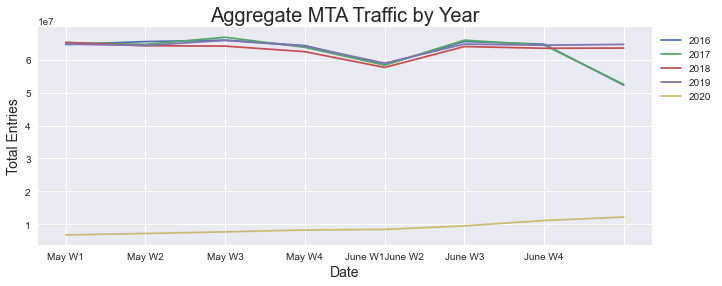

In [79]:
df_grouped_by_year.plot(figsize=(11,4))
plt.title("Aggregate MTA Traffic by Year", fontsize=20)
plt.ylabel('Total Entries', fontsize=14)
plt.xticks(ticks=range(18, 26), labels=['May W1', 'May W2', 'May W3', 'May W4', 'June W1'
                                           'June W2', 'June W3', 'June W4'])
plt.xlabel('Date', fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

### Stations to Target in Morning/Evening Rush Hour
Based on the time of day analysis above, we have determined that generally, the busiest times at subway stations are: 
`ENTER MORNING TIME HERE` and `ENTER EVENING TIME HERE`. 

First filter the data into two groups: morning rush hour and evening rush hour.

In [3]:
df_morning = df_mta[(df_mta['DATETIME'].dt.hour < 10) & (df_mta['DATETIME'].dt.hour > 8)]
df_evening = df_mta[(df_mta['DATETIME'].dt.hour < 18) & (df_mta['DATETIME'].dt.hour > 16)]

Group the data by station, and create a column containing the sum of entries and exits (total traffic).

In [4]:
df_morning = df_morning.groupby('STATION', as_index=False).sum()
df_morning['TOTAL_TRAFFIC'] = df_morning['HOURLY_ENTRIES'] + df_morning['HOURLY_EXITS']

df_evening = df_evening.groupby('STATION', as_index=False).sum()
df_evening['TOTAL_TRAFFIC'] = df_evening['HOURLY_ENTRIES'] + df_evening['HOURLY_EXITS']

Sort each time of day grouping and determine the top 10 stations by traffic for each.

In [5]:
df_morning.sort_values('TOTAL_TRAFFIC', ascending=False, inplace=True)
df_morning_top_10 = df_morning[0:10]
df_morning_top_10

,STATION,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,HOURLY_ENTRIES,HOURLY_EXITS,TOTAL_TRAFFIC
16,14 ST-UNION SQ,344163389187,132732532831,3.441611e+11,1.327280e+11,2146956.0,4502960.0,6649916.0
278,GRD CNTRL-42 ST,414314466440,310911412310,4.151756e+11,3.109776e+11,1829189.0,3894532.0,5723721.0
130,96 ST,250486191473,241378239842,2.504937e+11,2.413783e+11,3153598.0,1966138.0,5119736.0
269,FULTON ST,275770154882,723601978157,2.757687e+11,7.235990e+11,1462988.0,2938800.0,4401788.0
9,125 ST,1872998940069,1016851991624,1.875005e+12,1.017674e+12,2311018.0,1848729.0,4159747.0
110,72 ST,999936646904,1328906517998,9.999350e+11,1.328905e+12,1704122.0,1645972.0,3350094.0
6,116 ST,358817987344,418141599239,3.588158e+11,4.181408e+11,2175384.0,835830.0,3011214.0
106,7 AV,502416314635,302351183438,5.024175e+11,3.023516e+11,1423406.0,1539247.0,2962653.0
114,77 ST,163710203423,42914800853,1.637091e+11,4.291300e+10,1146062.0,1800569.0,2946631.0
48,23 ST,950279631345,792978667117,9.502787e+11,7.929770e+11,1055394.0,1831332.0,2886726.0


In [6]:
df_evening.sort_values('TOTAL_TRAFFIC', ascending=False, inplace=True)
df_evening_top_10 = df_evening[0:10]
df_evening_top_10

,STATION,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,HOURLY_ENTRIES,HOURLY_EXITS,TOTAL_TRAFFIC
12,14 ST-UNION SQ,339044459774,131101383593,3.389212e+11,1.310961e+11,8015065.0,6380872.0,14395937.0
135,CANAL ST,1406941561105,1569439437126,1.407334e+12,1.568304e+12,4667053.0,2804462.0,7471515.0
85,96 ST,247086765200,236082343318,2.470825e+11,2.360795e+11,4315304.0,2871233.0,7186537.0
197,GRD CNTRL-42 ST,398386326464,293331865931,3.984041e+11,2.933448e+11,3830738.0,2719561.0,6550299.0
193,FULTON ST,262413314723,714187509268,2.624094e+11,7.141855e+11,4016165.0,2041568.0,6057733.0
68,72 ST,997357020241,1325438099265,9.973542e+11,1.325436e+12,2961194.0,2775444.0,5736638.0
6,125 ST,1851505281202,1003870346493,1.851503e+12,1.003868e+12,3418117.0,2246285.0,5664402.0
328,W 4 ST-WASH SQ,150772746604,136076499455,1.507699e+11,1.360739e+11,2805174.0,2645365.0,5450539.0
30,23 ST,949235425381,791063268169,9.492325e+11,7.910613e+11,3142320.0,2105726.0,5248046.0
36,28 ST,528902029466,706404489819,5.303243e+11,7.080114e+11,2621974.0,1723795.0,4345769.0


Load station location info.

In [7]:
station_locations = pd.read_csv('raw_data/NYC_Transit_Subway_Entrance_And_Exit_Data.csv')
station_locations.drop_duplicates('Station Name', inplace=True)
station_locations.head()

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,...,ADA,ADA Notes,Free Crossover,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
0,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,...,False,NaN,False,4th Ave,25th St,SW,40.660489,-73.998220,"(40.660397, -73.998091)","(40.660489, -73.99822)"
2,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NW,40.654676,-74.004306,"(40.655144, -74.003549)","(40.654676, -74.004306)"
5,BMT,4 Avenue,45th St,40.648939,-74.010006,R,NaN,NaN,NaN,NaN,...,False,NaN,True,4th Ave,45th St,NE,40.649389,-74.009333,"(40.648939, -74.010006)","(40.649389, -74.009333)"
9,BMT,4 Avenue,53rd St,40.645069,-74.014034,R,NaN,NaN,NaN,NaN,...,False,NaN,True,4th Ave,53rd St,SW,40.644756,-74.014586,"(40.645069, -74.014034)","(40.644756, -74.014586)"
14,BMT,4 Avenue,59th St,40.641362,-74.017881,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,59th St,NW,40.641606,-74.017897,"(40.641362, -74.017881)","(40.641606, -74.017897)"


Change the station names to match the format in the MTA Station Location data loaded above.

In [8]:
df_morning_top_10['STATION'] = df_morning_top_10['STATION'].replace({
    '14 ST-UNION SQ': 'Union Square',
    'GRD CNTRL-42 ST': 'Grand Central-42nd St',
    '96 ST': '96th St',
    'FULTON ST': 'Fulton St',
    '125 ST': '125th St',
    '72 ST': '72nd St',
    '116 ST': '116th St',
    '7 AV': '7th Ave',
    '77 ST': '77th St',
    '23 ST': '23rd St',
})
df_evening_top_10['STATION'] = df_evening_top_10['STATION'].replace({
    '14 ST-UNION SQ': 'Union Square',
    'CANAL ST': 'Canal St',
    '96 ST': '96th St',
    'GRD CNTRL-42 ST': 'Grand Central-42nd St',
    'FULTON ST': 'Fulton St',
    '72 ST': '72nd St',
    '125 ST': '125th St',
    'W 4 ST-WASH SQ': 'West 4th St',
    '23 ST': '23rd St',
    '28 ST': '28th St'
})

<ipython-input-8-e358c8fd269c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_morning_top_10['STATION'] = df_morning_top_10['STATION'].replace({
<ipython-input-8-e358c8fd269c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evening_top_10['STATION'] = df_evening_top_10['STATION'].replace({


Change column name to match MTA Station Location data, and merge to get latitude and longitudes in turnstile dataframe.

In [11]:
df_morning_top_10.rename(columns={'STATION': 'Station Name'}, inplace=True)
df_morning_top_10 = df_morning_top_10.merge(station_locations, on='Station Name')

df_evening_top_10.rename(columns={'STATION': 'Station Name'}, inplace=True)
df_evening_top_10 = df_evening_top_10.merge(station_locations, on='Station Name')

Plot top morning and evening locations.

In [18]:
px.set_mapbox_access_token(
    'pk.eyJ1Ijoic3RldmVqa2FwbGFuIiwiYSI6ImNrYzU5cmU4MTAzZnMydGpoYW9samtjemsifQ.4vpWJGjiGUC-K389B4JdbA'
)
fig = px.scatter_mapbox(df_morning_top_10, lat="Entrance Latitude", lon="Entrance Longitude", size="HOURLY_ENTRIES",
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=11, opacity=0.5,
                        width=600,height=800, mapbox_style='light', color='Station Name', 
                        title='Top 10 Stations: Morning Commute at ?AM')
fig.show()

fig = px.scatter_mapbox(df_evening_top_10, lat="Entrance Latitude", lon="Entrance Longitude", size="HOURLY_ENTRIES",
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=11, opacity=0.5,
                        width=600,height=800, mapbox_style='dark', color='Station Name',
                        title='Top 10 Stations: Evening Commute at ?PM')
fig.show()

#### 2. Time of Day Trends

#### 3. Day of Week Trends

#### 4. Days to Avoid

#### 5. Coronavirus Caveat (long term time trend) (202020 vs previous year)

recommend specific booths to stand near since different booths service different isolated access points in the station